# **Features selection for data minimization** 


In order to preserve privacy in our dataset, it is important to minimize the amount of data used. We will see here how to apply data minimization techniques in a binary classification context. Let's imagine that a company is looking to hire a new employee. They use a machine learning algorithm to select the top candidates. The candidates are assigned either 0 if they are not selected or 1 if they are. 


In this notebook, we will:
1. Load and organise the data 
2. Train a benchmark Logistic regression model 
3. Perform feature selction and compare performance with benchmark
4. Display results and observe the effects on accuracy 

We will implement the Logistic regression model and feature selction in [scikit-learn](https://scikit-learn.org/stable/). 


## **Install Libraries and load data**

In [ ]:
# install AIF360
!pip install aif360
!pip install fairlearn==0.7.0

import pickle
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



Load the data into a dataframe using pickle.load

In [ ]:
# load data
with open('hiring.pkl', 'rb') as handle:
    df = pickle.load(handle)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,497,498,499,Gender_Female,Gender_Male,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Action
0,28.021737,4.351153,2.453895,1.637143,-1.746628,-0.483463,0.034170,1.399225,-0.795440,0.417474,...,0.258914,-0.050558,0.014513,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29.603342,-3.407193,0.771800,-2.957411,0.599226,-2.805277,0.329414,-2.055339,-1.194446,-0.633159,...,0.442939,-0.054423,0.026959,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.504283,0.642464,2.522944,-2.197094,2.270646,-0.472510,0.532815,-0.266449,-0.131638,1.038315,...,0.017111,-0.012309,0.264572,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,25.012088,0.895121,-2.092517,3.687830,0.539642,1.988930,1.121646,2.255337,-0.128801,1.148379,...,-0.149901,-0.217130,0.004403,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.358934,-2.332423,0.154999,-2.623793,1.682456,1.262280,-1.685565,0.489319,-0.043471,-0.372265,...,0.033429,-0.199198,0.229629,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31765,28.366808,3.697922,3.563571,-2.150857,-0.434302,0.678316,-2.203074,-0.244846,-0.568165,-0.760018,...,0.131910,-0.143816,-0.313901,0.0,1.0,0.0,0.0,1.0,0.0,1.0
31766,27.366891,-1.487017,-3.040194,-0.231647,-0.557333,-1.919395,1.733025,-0.523544,-1.182572,0.001023,...,0.114989,-0.511371,0.065787,1.0,0.0,0.0,0.0,1.0,0.0,1.0
31768,26.421217,2.768473,4.175005,-2.132873,-1.590674,2.238180,1.423327,-1.875555,0.495852,-0.262379,...,0.201736,-0.289361,-0.148308,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31769,27.286430,5.486510,-2.384405,-0.535356,-1.621977,1.019637,1.298022,-0.809889,-1.387841,-0.497270,...,-0.252254,-0.073340,0.556241,1.0,0.0,0.0,0.0,1.0,0.0,1.0


We can see here that the dataset is composed of 27774 data points and 507 features. We will see in the following how it is possible to decrease the number of both instances and features. 

## **Run a baseline predictive model**
First we will build a standard Logistic Regression and observe some baseline results, using the original data and without any data minimization technique.

We train a Logistic Regression with 10 fold stratified cross validation and compute performance metrics (Accuracy, Precision, Recall and F1 Score).

In [ ]:
# Instantiate the classifier

model = LogisticRegression(penalty='none')

# instantiate the cross-validation scheme
mv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# setup the performance metrics to be computed
perf_metrics = {"Accuracy": metrics.accuracy_score, 
                "Precision": metrics.precision_score, 
                "Recall": metrics.recall_score, 
                "F1-Score": metrics.f1_score, 
                }
                
# instantiating X
df.columns = df.columns.astype(str)
X = df.drop(labels=df.columns[-1], axis=1)

# instantiating the target variable
y = df[df.columns[-1]]


In [ ]:
# Train a baseline logistic regression classifier on the dataset before applying the Reductions method
k, i = True, 1

# instantiating X
df.columns = df.columns.astype(str)
X = df.drop(labels=df.columns[-1], axis=1)

# instantiating the target variable
y = df[df.columns[-1]]

def cross_validation(X, y, model, mv):
 
  k, i = True, 1
  for (train, test) in mv.split(X, y):

      # fit model
      X_train = X[train, :].copy()
      y_train = y[train].copy()
      model = model.fit(X_train, y_train)
      
      # get predictions in the test set
      ypred_class = model.predict(X[test])

      # compute performance metrics
      metrics_list = []
      X_test = X[test, :].copy()
      y_test = y[test].copy()
      for pf in perf_metrics.keys():
              metrics_list += [[pf, perf_metrics[pf](y[test], ypred_class)]]

      # concatenate results
      df_m = pd.DataFrame(metrics_list, columns=["Metric", "Value"])
      df_m["Fold"] = i
      i += 1
      if k:
          df_metrics_orig = df_m.copy()
          k=False
      else:
          df_metrics_orig = pd.concat([df_metrics_orig, df_m.copy()], axis=0, ignore_index=True)

  return df_metrics_orig

df_metrics_orig = cross_validation(X.to_numpy(), y.to_numpy(), model, mv)

In [ ]:
# Display results
metrics_table_orig = df_metrics_orig.pivot_table(index="Metric", values="Value", aggfunc=["mean", "std"])
metrics_table_orig

,mean,std
,Value,Value
Metric,,
Accuracy,0.711097,0.004366
F1-Score,0.592818,0.004750
Precision,0.646369,0.008599
Recall,0.547525,0.005777


## **Perform Feature Selection**
First we will perform feature selection with the following methods:  
* SelectPercentile selects the top *p* features according to ANOVA scores. Here we take p to be the top 10% and 20% of the features 
* VarianceThreshold selects all features that present a variance higher than a given threshold (here 0.2 and 0.5)
* SelectFromModel selects the most important features according to a model, here a logistic regression model 
* Recursive Feature Elimination recursevely removes features according to a model, here a logistic regression model 




In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, RFE, f_classif, SelectFromModel, SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier


feature_selection_methods = {'Percentile10': SelectPercentile(f_classif, percentile=10), 
                             'Percentile20': SelectPercentile(f_classif, percentile=20), 
                             'Variance0.2': VarianceThreshold(threshold=0.2),
                             'Variance0.3': VarianceThreshold(threshold=0.3),
                             'FromModel': SelectFromModel(estimator=LogisticRegression()),
                             'RFE': RFE(LogisticRegression(), n_features_to_select=0.2),
                             }

We will now perform feature selection, and then train our Logistic Regression. We estimate the amount of data minimization by computing the proportion of removed features out of the total number of features. This metric will allow us to compare the various feature selection methods. 


In [ ]:
n_feat = X.shape[1]
i = True

for fs in feature_selection_methods.keys():

  #Perform feature selection
  X_new = feature_selection_methods[fs].fit_transform(X, y)
  
  #Calculate data minimization score (percentage of features reduced)
  min_score = 1 - X_new.shape[1]/n_feat

  #Fit model on the transformed data
  df_metrics = cross_validation(X_new, y.to_numpy(), model, mv)

  # Aggregate results in the same table 
  df_metrics = df_metrics.pivot_table(index="Metric", values="Value", aggfunc=["mean"])
  df_metrics.columns = df_metrics.columns.droplevel()
  df_min_score = pd.DataFrame([min_score], index=["Data_min"], columns=["Value"])
  df_metrics = pd.concat([df_metrics, df_min_score.copy()], axis=0, ignore_index=False).transpose()
  df_metrics = df_metrics.rename(index={'Value': fs})

  # Create larger dataframe
  if i:
      df_performance = df_metrics.copy()
      i=False
  else:
      df_performance = pd.concat([df_performance, df_metrics.copy()], axis=0, ignore_index=False)


## **Display the results and the relationship with the accuracy performance metric**

 We then compare this score for different feature selection methods. Please not that for some of these methods like SelectPercentile, the ratio was enforced as one of the parameters. 

In [ ]:
df_performance

,Accuracy,F1-Score,Precision,Recall,Data_min
Percentile10,0.703788,0.580974,0.636209,0.534682,0.899209
Percentile20,0.709872,0.589610,0.645528,0.542651,0.800395
Variance0.2,0.704220,0.583392,0.635461,0.539277,0.610672
Variance0.3,0.702347,0.581077,0.632405,0.537495,0.747036
FromModel,0.713401,0.595681,0.650232,0.549681,0.569170
RFE,0.703031,0.577911,0.636525,0.529246,0.800395


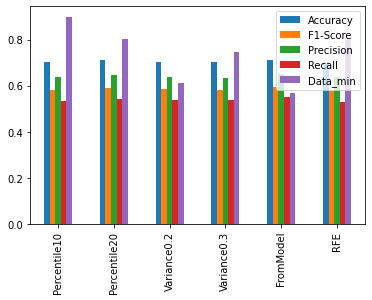

In [ ]:
df_performance.plot.bar()

We can now plot the data minimization score vs the accuracy of the classifier. This will give us an idea of whether feature selection hurts performance. 

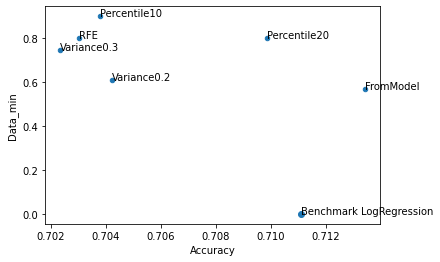

In [ ]:
ax = df_performance.plot.scatter(x='Accuracy', y='Data_min')

for i, txt in enumerate(df_performance.index.values):
   ax.annotate(txt, (df_performance.Accuracy.iat[i], df_performance.Data_min.iat[i]))

plt.scatter(metrics_table_orig.loc['Accuracy']['mean']['Value'], 0)
ax.annotate('Benchmark LogRegression', (metrics_table_orig.loc['Accuracy']['mean']['Value'], 0))

plt.show()

We can see that the performnace decreases slightly for some of these methods, while for others it is virtually unchanged. 